# **Data Science and Machine Learning**


## Business Understanding

#### I am interested in developing a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format [Fraud csv](C:\Users\Dell\Downloads\Fraud.csv)

#### ***I will explore the machine learning algorithm, Logistic Regression to execute the process for proactive detection of fraud.***

In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # to check the performance of the model

## Data Understanding

In [2]:
# loading the dataset to a panda dataframe
fraud_data= pd.read_csv('C:/Users/Dell/Desktop/Python Project1/Fraud.csv')

#### Data Cleaning

In [30]:
# Data cleaning
fraud_data = fraud_data.drop(columns=['nameOrig', 'nameDest'])  

In [38]:
fraud_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


In [39]:
fraud_data.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6362615,743,339682.13,339682.13,0.0,0.00,339682.13,1,0,True,False,False,False
6362616,743,6311409.28,6311409.28,0.0,0.00,0.00,1,0,False,False,False,True
6362617,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,True,False,False,False
6362618,743,850002.52,850002.52,0.0,0.00,0.00,1,0,False,False,False,True
6362619,743,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0,True,False,False,False


In [40]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   type_CASH_OUT   bool   
 9   type_DEBIT      bool   
 10  type_PAYMENT    bool   
 11  type_TRANSFER   bool   
dtypes: bool(4), float64(5), int64(3)
memory usage: 412.6 MB


#### Finding missing values

In [41]:
# checking the number of missing values in each coloumn
fraud_data.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

We can see that there are no missing values in the Data, so we can move ahead to the Data preparation for the analysis.

In [42]:
# distribution of legit transactions and fraudulent transactions
fraud_data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

It can be observed that it is a unbalanced data, very less part of the data is showing the fradulent transactions. We cannot use the data as it is to train our machine learning model. We need to process the data before using it.

### Data Preparation

In [43]:
# seperating the data for analysis
legit= fraud_data[fraud_data.isFraud == 0]
fraud= fraud_data[fraud_data.isFraud == 1]

In [44]:
print(legit.shape)
print(fraud.shape)

(6354407, 12)
(8213, 12)


In [45]:
# statistical measures of the data
legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [46]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

##### Under-Sampling

In [47]:
legit_sample= legit.sample(n=8213)

##### Concatenating the two Dataframes

In [48]:
new_data= pd.concat([legit_sample, fraud], axis= 0)

In [49]:
new_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4443869,323,21351.35,0.0,0.00,0.00,0.00,0,0,False,False,True,False
2862999,227,242741.51,88705.0,0.00,333574.25,576315.76,0,0,True,False,False,False
989451,45,162605.79,107605.0,270210.79,0.00,0.00,0,0,False,False,False,False
2811143,225,263489.92,6033.0,0.00,0.00,263489.92,0,0,True,False,False,False
363296,17,28080.92,12085.0,0.00,0.00,0.00,0,0,False,False,True,False


In [50]:
new_data['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

##### Splitting the data into Features and Targets

In [51]:
X= new_data.drop(columns= 'isFraud', axis= 1)
Y= new_data[['isFraud']]

In [52]:
print(X)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
4443869   323    21351.35           0.00            0.00            0.00   
2862999   227   242741.51       88705.00            0.00       333574.25   
989451     45   162605.79      107605.00       270210.79            0.00   
2811143   225   263489.92        6033.00            0.00            0.00   
363296     17    28080.92       12085.00            0.00            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
4443869          

In [65]:
Y = np.ravel(Y)

In [66]:
print(Y)

[0 0 0 ... 1 1 1]


#### Split the data into training and testing data 

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [68]:
print(X.shape, X_train.shape, X_test.shape)

(16426, 11) (13140, 11) (3286, 11)


### Model Training

#### ***Logistic Regression***: The reason to choose this model is that,
- Logistic regression is relatively simple compared to more complex algorithms like neural networks. It does not require as much computation and can be trained quickly, making it practical for real-time or near-real-time fraud detection. 
- It can handle large datasets efficiently, making it suitable for processing large volumes of transactions that occur in financial systems.
- Fraud detection datasets often suffer from class imbalance, where fraudulent transactions are much rarer than legitimate ones. Logistic regression can handle imbalanced data reasonably well and can be combined with techniques like oversampling or cost-sensitive learning.                                                              

In [69]:
model= LogisticRegression()

In [70]:
# Training the model with the training data
model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [71]:
# accuracy on training data
X_train_prediction= model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [72]:
print(training_data_accuracy)

0.9029680365296804


In [73]:
# accuracy on test data
X_test_prediction= model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [74]:
print(test_data_accuracy)

0.9013998782714546


#### To demonstrate the performance of the Model using seaborn and matloptlib

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

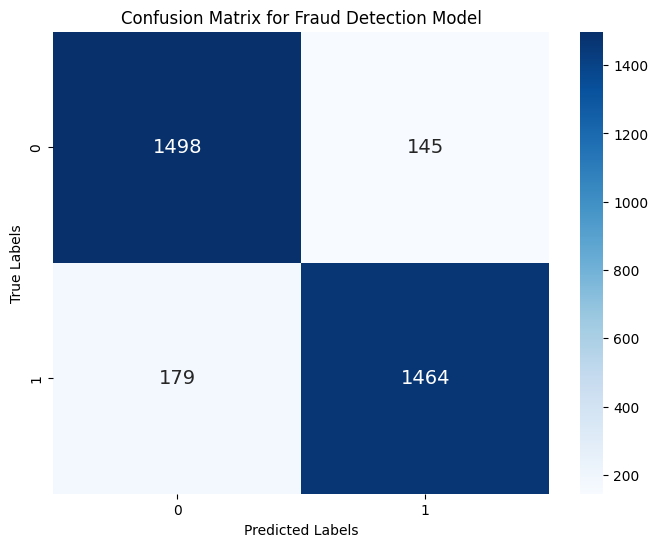

In [78]:
cm = confusion_matrix(Y_test, X_test_prediction)

# Creating a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title("Confusion Matrix for Fraud Detection Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### According to the Confusion Matrix we make the following observations:
- **True Positive**: The model correctly predicted 1464 transactions as fraudulent.
- **True Negative**: The model correctly predicted 1498 transactions as legitimate.
- **False Positive**: The model incorrectly predicted 145 transactions as fraudulent when they were actually legitimate.
- **False Negative**: The model incorrectly predicted 179 transactions as legitimate when they were actually fraudulent.

#### Key Factors that predict fradulent Customer

In [80]:
feature_names = X.columns
# Get feature coefficients
coefficients = model.coef_[0]
# Create a dictionary to store feature names and coefficients
feature_coefficients = dict(zip(feature_names, coefficients))
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

print("Top Key Factors for Predicting Fraudulent Customers:")
for feature, coefficient in sorted_features[:5]:
    print(f"{feature}: {coefficient:.4f}")

Top Key Factors for Predicting Fraudulent Customers:
step: -0.0023
newbalanceOrig: -0.0000
oldbalanceOrg: 0.0000
newbalanceDest: -0.0000
oldbalanceDest: 0.0000


####  Yes, this factor could make sense. The coefficient value associated with the "step" feature being -0.0023 means that for every one-hour increase in time (step), the log-odds of the transaction being fraudulent decrease by approximately 0.0023.
-**Negative Coefficient**: The negative sign of the coefficient indicates an inverse relationship between the "step" feature and the likelihood of fraud. As the value of "step" increases (time advances), the model predicts a decreased likelihood of the transaction being fraudulent.

-**Magnitude**: The magnitude of the coefficient value (-0.0023) indicates the strength of this relationship. Larger absolute coefficient values imply a stronger impact of the feature on the model's predictions. In this case, -0.0023 is a relatively small coefficient, suggesting that the effect of "step" on predicting fraud is not very strong.

 #### Prevention which  should be adopted while company update its infrastructure is:

-Implement real-time monitoring of transactions, account activities, and user behaviors to identify unusual or suspicious patterns. 

-Analyze user behavior and transaction patterns to detect deviations from normal behavior. For example, sudden large transfers or multiple transactions to unfamiliar destinations might raise alarms.


In [ ]:
#### If these actions have been implemented The effectiveness of implemented fraud prevention measures involves a combination of monitoring, analysis, and ongoing evaluation. 
-Track the number and nature of detected fraudulent incidents over time. A decrease in the number of fraud incidents could indicate the effectiveness of prevention measures.
-Monitor the rate of false positives (legitimate transactions flagged as fraud). A reduction in false positives indicates that the prevention measures are becoming more accurate.


### **Author**
### Reetika Bhatt